# CPD Output

The output of the *cpd* function is of the form

                        Lambda, X, Y, Z, T_approx, output

We will see what each one of these outputs represents. Let's start importing the necessary modules and creating the same tensor of the previous lessons.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TensorFox as tfx

In [2]:
# Create and print the tensor.
m = 2
T = np.zeros((m, m, m))
s = 0

for k in range(m):
    for i in range(m):
        for j in range(m):
            T[i,j,k] = s
            s += 1
            
Tsize = np.linalg.norm(T)        
tfx.disp.showtens(T)

[[0. 1.]
 [2. 3.]]

[[4. 5.]
 [6. 7.]]



# The arrays $\Lambda, X, Y, Z, T_{approx}$

Given the tensor $T \in \mathbb{R}^{m \times n \times p}$ we want to approximate and a rank $r$, we have that $\Lambda \in \mathbb{R}^{r \times r \times r}, X \in \mathbb{R}^{m \times r}, Y \in \mathbb{R}^{n \times r}, \mathbb{R}^{p \times r}$ and $T_{approx} \in \mathbb{R}^{m \times n \times p}$. These outputs are such that

$$T_{approx} = (X, Y, Z) \cdot \Lambda.$$

Ideally, we want to have $T_{approx} \approx T$. The matrices $X, Y, Z$ are called the *factor matrices* and the tensor $\Lambda$ is called the *central tensor*. Since $\Lambda$ is a diagonal tensor, we store it as an array in $\mathbb{R}^r$.

# The class *Output*

As the name suggests, this output contains information about all the computations made to achieve the approximate CPD of $T$. The class *output* comes with the following variables:

- **rel_error**: $\displaystyle = \frac{\|T - T_{approx}\|}{\|T\|}$

- **step_sizes**: It is a list with two arrays. The arrays contains sizes of the steps given at each iteration of the function *dGN* in the first (main) and seconds (refinement) stages.

- **errors**: It is a list with two arrays. The arrays contains absolute errors at each iteration of the function *dGN* in the first (main) and seconds (refinement) stages.

- **errors_diff**: It is a list with two arrays. The arrays contains the differences between consecutive absolute errors at each iteration of the function *dGN* in the first (main) and second (refinement) stages.

- **gradients**: It is a list of two arrays. The arrays contains the infinity norm of the gradient at each iteration of the function *dGN* in the first (main) and seconds (refinement) stages. We expect that both arrays converges to zero since the minimum is a critical point.

- **num_steps**: Total number of steps (iterations of dGN) made in the two stages, main and refinement.

- **accuracy**: It is the value $100\cdot (1 - $*rel_error*$)$. If the relative error is too big (bigger than $1$), the program just set the accuracy to $0$ so there is no negative accuracy. 

- **stop**: It is a list with three integers. The first one is a number indicating what kind of truncation was obtained by the function *mlsvd* (because this function computes the MLSVD and truncates it immediately). The second one is a number indicating what stopping condition made the *dGN* function stop iterating at the main stage, and the third one is a number indicating what stopping condition made the *dGN* function stop iterating at the refinement stage.

- **stop_msg**: This method prints messages describing the reason for each stop at each one of the three stages mentioned in the list *stop* above.

**PS**: Some information is already printed when the parameter *display* is bigger than $0$. 

In [3]:
# Compute the CPD of T.
class options:
    display = 1
    refine = True

r = 3
Lambda, X, Y, Z, T_approx, output = tfx.cpd(T, r, options)

--------------------------------------------------------------------------------------------------------------
Computing MLSVD of T
    No compression detected
    Working with dimensions (2, 2, 2)
--------------------------------------------------------------------------------------------------------------
Type of initialization: smart_random
--------------------------------------------------------------------------------------------------------------
Computing CPD of T
--------------------------------------------------------------------------------------------------------------
Computing refinement of solution
Final results
    Number of steps = 37
    Relative error = 1.4999213488166658e-07
    Accuracy =  99.99999 %


In [4]:
# Show the informations contained in the class 'output'
print('Number of steps in main stage =', output.step_sizes[0].size)
print()
print('Number of steps in refinement stage =', output.step_sizes[1].size)
print()
print('Total number of steps =', output.num_steps)
print()
print('Relative error =', output.rel_error)
print()
print('Accuracy =', np.round(output.accuracy,5), '%')
print()
print('Stop numbers:', output.stop)
print()
print('Description of each stop:') 
print('-------------------------')
print(output.stop_msg())

Number of steps in main stage = 33

Number of steps in refinement stage = 4

Total number of steps = 37

Relative error = 1.4999213488166658e-07

Accuracy = 99.99999 %

Stop numbers: [3, 2, 2]

Description of each stop:
-------------------------
MLSVD stop:
3 - The program was unable to compress at the very first iteration. In this case the tensor singular values are equal or almost equal. The program stops the truncation process when this happens.

Main stop:
2 - The gradient is close enough to 0.

Refinement stop:
2 - The gradient is close enough to 0.
None


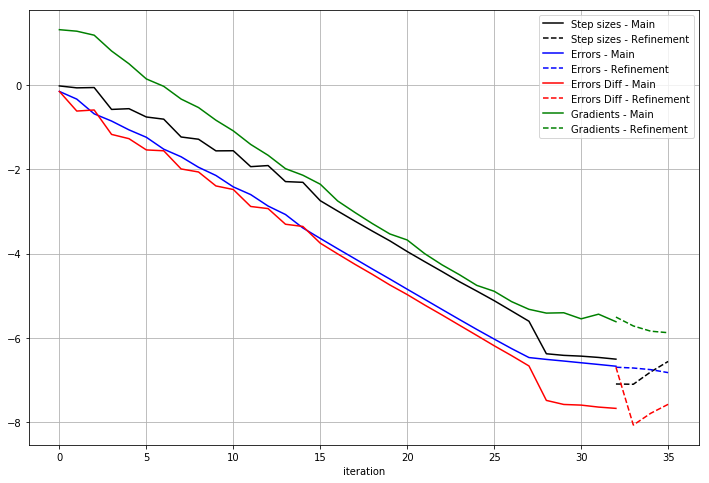

In [5]:
# The outputs step_sizes, errors, errors_diff and gradients are plotted together below
# We put both stages (main and refinement) in the same plot.
plt.figure(figsize=[12,8])

# We divide the arrays of errors by the norm of T to obtain values associated to the relative errors.
Tsize = np.linalg.norm(T)

# a is the size of the arrays of the main stage and b is the size of the arrays of the refinement stage.
a = output.step_sizes[0].size
b = output.step_sizes[1].size

# Step sizes
plt.plot(np.arange(a), np.log10(output.step_sizes[0]),'k-' , markersize=2, label='Step sizes - Main')
plt.plot(np.arange(a-1, a+b-1), np.log10(output.step_sizes[1]),'k--' , markersize=2, label='Step sizes - Refinement')

# Errors
plt.plot(np.arange(a), np.log10(output.errors[0]/Tsize),'b-' , markersize=2, label='Errors - Main')
plt.plot(np.arange(a-1, a+b-1), np.log10(output.errors[1]/Tsize),'b--' , markersize=2, label='Errors - Refinement')

# Errors diff
plt.plot(np.arange(a), np.log10(output.errors_diff[0]/Tsize), 'r-', markersize=2, label='Errors Diff - Main')
plt.plot(np.arange(a-1, a+b-1), np.log10(output.errors_diff[1]/Tsize), 'r--', markersize=2, label='Errors Diff - Refinement')

# Gradients
plt.plot(np.arange(a), np.log10(output.gradients[0]), 'g-', markersize=2, label='Gradients - Main')
plt.plot(np.arange(a-1, a+b-1), np.log10(output.gradients[1]), 'g--', markersize=2, label='Gradients - Refinement')

plt.xlabel('iteration')
plt.grid()
plt.legend()
plt.show()